## Assignment Part-I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

## Business Goal

- Build a linear regression model to predict the price of houses with the available independent variables. 
- This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train (1).csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

## Data Cleaning
### Calculating percentage of null values

In [7]:
round(100*df[df.columns[df.isnull().any()]].isnull().sum()/len(df),2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

### Analysing categorical features

In [8]:
df_categorical = df.select_dtypes(include=['object'])

In [9]:
round(100*df_categorical[df_categorical.columns[df_categorical.isnull().any()]].isnull().sum()/len(df_categorical),2)

Alley           93.77
MasVnrType       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

- Some of the 'NA' columns contain meaningful information as they are not null values
- Changing NA to 'None'

In [10]:
cols = ('Alley','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2', 
        'FireplaceQu', 'GarageType','GarageFinish','GarageQual','GarageCond', 'PoolQC','Fence','MiscFeature','Electrical','MasVnrType')
for col in cols:
    df[col] = df[col].fillna('None')

#### Removing null values in numerical columns

In [11]:
df_numerical = df.select_dtypes(exclude=['object'])
df_numerical.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
round(100*df_numerical[df_numerical.columns[df_numerical.isnull().any()]].isnull().sum()/len(df_numerical),2)

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [13]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace = True)

In [14]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)


In [15]:
# Setting the null values with ffill for GarageYrBlt 
df['GarageYrBlt']=df['GarageYrBlt'].ffill(axis = 0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [16]:
round(100*df[df.columns[df.isnull().any()]].isnull().sum()/len(df),2)

Series([], dtype: float64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Outlier Analysis for numerical columns

<AxesSubplot:ylabel='ScreenPorch'>

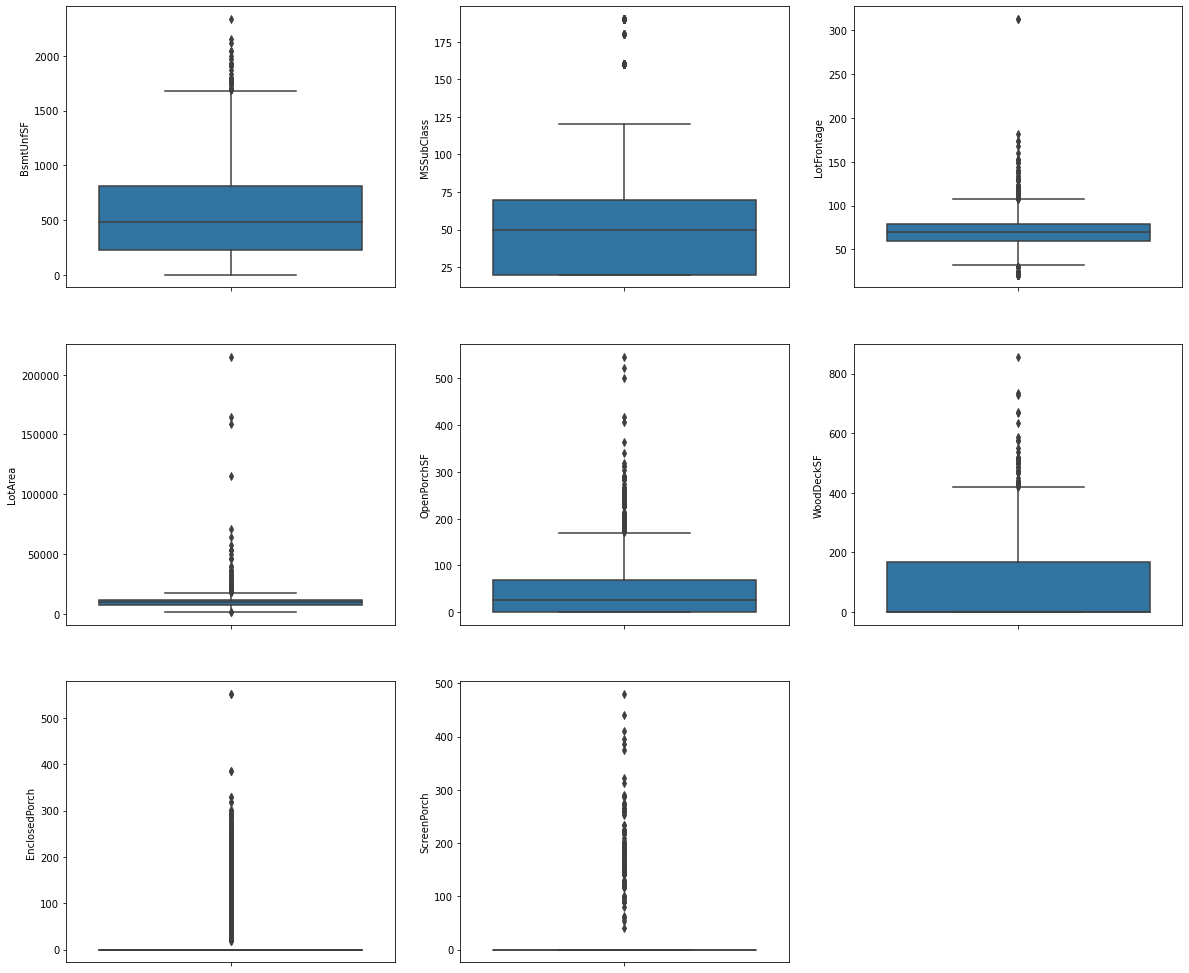

In [18]:
plt.figure(figsize = (20,30))
plt.subplot(5,3,1)
sns.boxplot(y ='BsmtUnfSF',data = df )
plt.subplot(5,3,2)
sns.boxplot(y ='MSSubClass',data = df )
plt.subplot(5,3,3)
sns.boxplot(y ='LotFrontage',data = df )
plt.subplot(5,3,4)
sns.boxplot(y ='LotArea',data = df )
plt.subplot(5,3,5)
sns.boxplot(y ='OpenPorchSF',data = df )
plt.subplot(5,3,6)
sns.boxplot(y ='WoodDeckSF',data = df )
plt.subplot(5,3,7)
sns.boxplot(y ='EnclosedPorch',data = df )
plt.subplot(5,3,7)
sns.boxplot(y ='EnclosedPorch',data = df )
plt.subplot(5,3,8)
sns.boxplot(y ='ScreenPorch',data = df )

In [19]:
#Removing outliers
nn_quartile_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < nn_quartile_LotArea]

nn_quartile_LotFrontage = df['LotFrontage'].quantile(0.99)
df = df[df["LotFrontage"] < nn_quartile_LotFrontage]

nn_quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

nn_quartile_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

### Data Visualisation

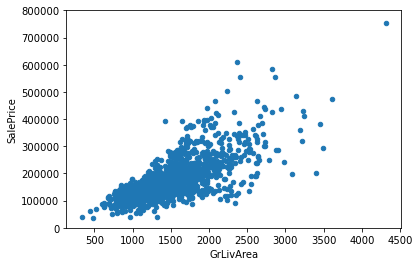

In [20]:
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));


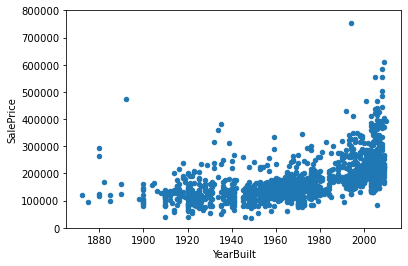

In [21]:

var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

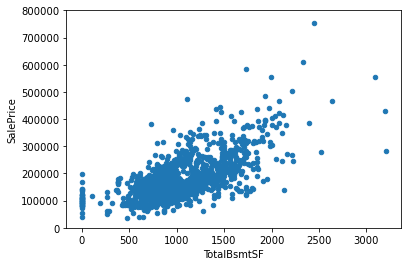

In [22]:
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can see that the Sale Price varies with GrLivingArea, YearBuilt and TotalBsmtSF

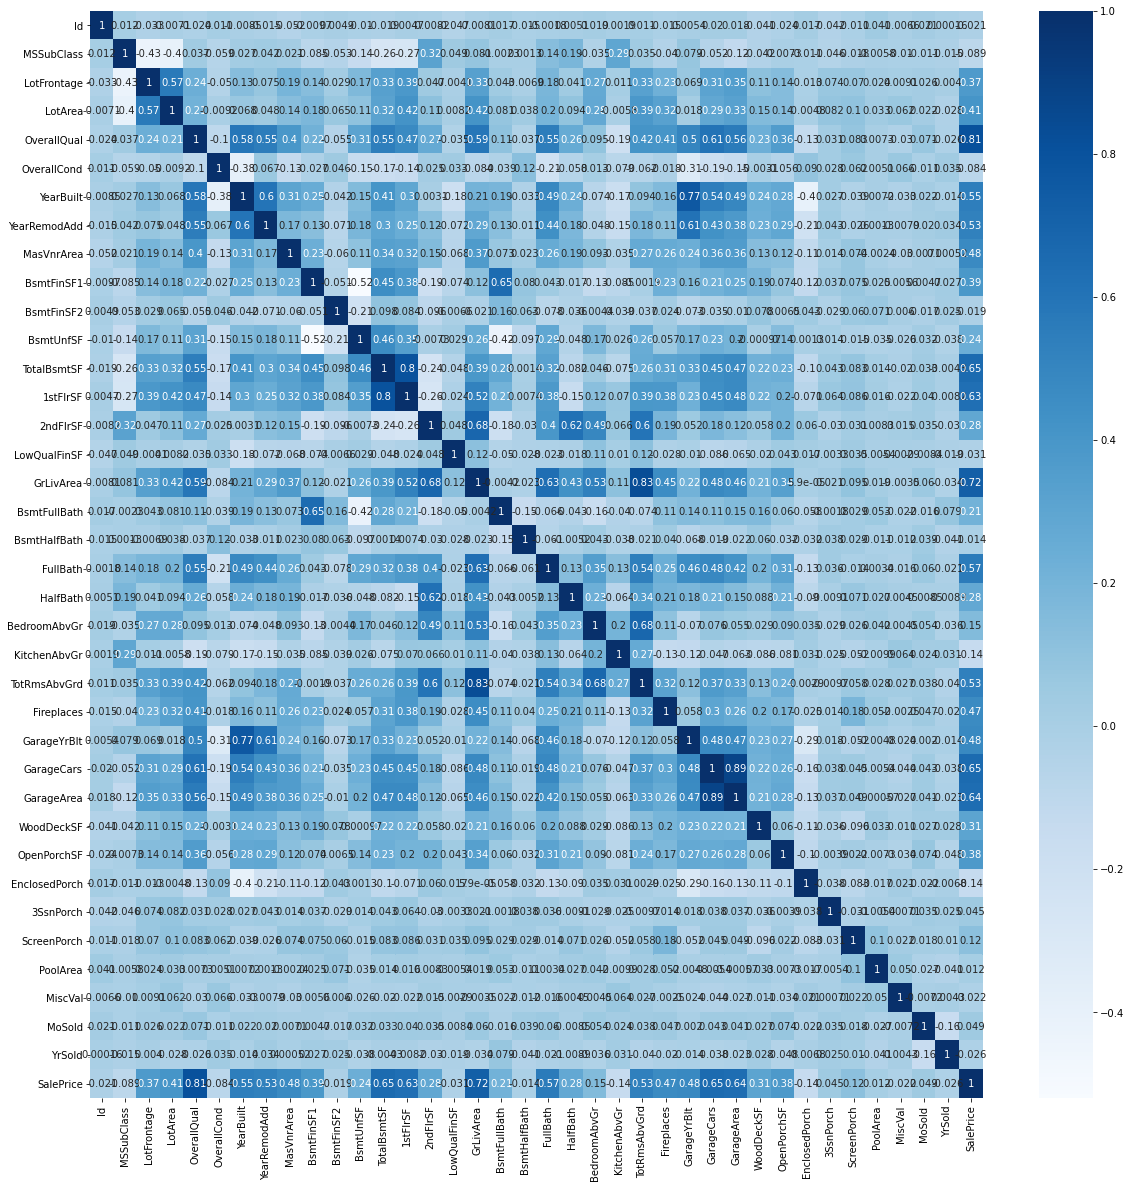

In [23]:

# Check the correlation of numerical columns

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap="Blues")
plt.show()

In [24]:
# Removing columns with high corelation
df.drop(['TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'], axis = 1, inplace = True)

In [25]:
df.shape

(1386, 78)

#### Investigating the target variable - SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

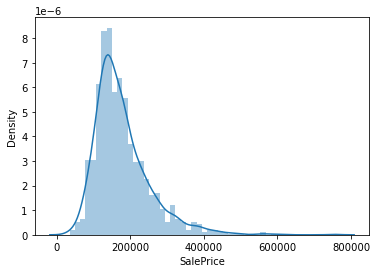

In [26]:
sns.distplot(df['SalePrice'])

In [27]:
df['SalePrice'].skew()

1.7383630232232004

In [28]:
df['SalePrice'].kurt()

5.5111979023065185

- The target variable is highly skewed. Performing logarithmic scale to make data normally distributed

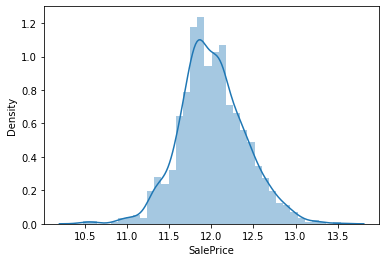

In [29]:
sns.distplot(np.log(df['SalePrice']));

In [30]:
df['SalePrice'] = np.log(df['SalePrice'])

### Converting categorical variables to dummy variables

In [31]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['d_BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['d_HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['d_Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df['d_LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['d_MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['d_SaleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})


df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,5,4,3,2,1,4,0,2,1,1


In [32]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

df = df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Lvl,AllPub,Gtl,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Pave,None,Lvl,AllPub,Gtl,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,Pave,None,Lvl,AllPub,Gtl,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,Pave,None,Lvl,AllPub,Gtl,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,Pave,None,Lvl,AllPub,Gtl,...,5,4,3,2,1,4,0,2,1,1


In [33]:
df = df.drop(['Id'], axis = 1)

In [34]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond',
       'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional',
       'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'MiscFeature', 'SaleType'],
      dtype='object')

In [35]:
# convert into dummies
data_dummies = pd.get_dummies(df_categorical, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [36]:
#dropping original categorical columns
df = df.drop(list(df_categorical.columns), axis=1)

In [37]:
#concatenating dummy columns to original dataframe
df = pd.concat([df,data_dummies], axis=1)

In [38]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.columns

Index([], dtype='object')

In [39]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,0,0,0,0,0,1


### Model Building

In [40]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [41]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,...,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,56.991342,68.629719,9474.703463,6.082251,5.580087,1971.502886,1984.893218,100.687444,428.642136,43.889610,...,0.031746,0.000722,0.002886,0.001443,0.006494,0.002886,0.003608,0.084416,0.002165,0.866522
std,42.264885,18.066007,3608.458826,1.362368,1.112973,30.206348,20.722373,174.242876,426.010575,154.869425,...,0.175386,0.026861,0.053663,0.037973,0.080349,0.053663,0.059976,0.278110,0.046491,0.340213
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7454.750000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,50.000000,70.049958,9315.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,375.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,70.000000,78.000000,11316.750000,7.000000,6.000000,2001.000000,2004.000000,162.000000,697.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,190.000000,129.000000,25095.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 206 entries, MSSubClass to SaleType_WD
dtypes: float64(2), int64(46), uint8(158)
memory usage: 744.4 KB


In [43]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
296,50,75.000000,13710,5,5,1950,1950,0.0,420,0,...,0,0,0,0,0,0,0,0,0,1
757,60,70.049958,11616,6,5,1978,1978,328.0,438,0,...,0,0,0,0,0,0,0,0,0,1
1382,70,60.000000,7200,7,7,1920,1950,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
540,20,85.000000,14601,9,5,2006,2006,584.0,1260,0,...,0,0,0,0,0,0,0,0,0,1
1404,50,60.000000,10410,3,4,1915,1950,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [47]:
from sklearn.preprocessing import StandardScaler

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)
scalar = StandardScaler()
cols = list(X.columns)

X_train[cols] = scalar.fit_transform(X_train[cols])
X_test[cols] = scalar.transform(X_test[cols])





### RFE

In [48]:
# Running RFE with the output number of the variable equal to 60

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 60)            
rfe = rfe.fit(X_train, y_train)

In [49]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 60 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,YearBuilt,True,1
4,YearRemodAdd,True,1
5,BsmtFinSF1,True,1
6,BsmtFinSF2,True,1
7,BsmtUnfSF,True,1
8,TotalBsmtSF,True,1
9,1stFlrSF,True,1


In [50]:
# Assign the 60 columns to X_train_rfe

X_train_rfe = X_train[col]

In [51]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [52]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [53]:
params = {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100.0,500.0,1000.0]
}
print(params)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}


In [54]:

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
8,0.5,-0.069842,-0.075191,1
7,0.4,-0.069837,-0.075191,2
6,0.3,-0.069832,-0.075191,3
5,0.2,-0.069827,-0.075191,4
9,0.6,-0.069846,-0.075193,5
4,0.1,-0.069822,-0.075193,6
3,0.05,-0.069820,-0.075194,7
2,0.01,-0.069818,-0.075194,8
1,0.001,-0.069817,-0.075194,9
0,0.0001,-0.069817,-0.075195,10


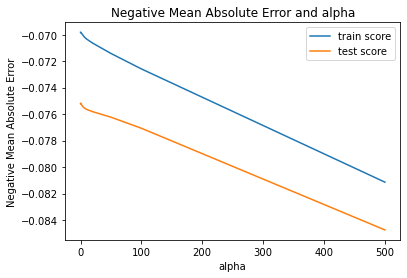

In [56]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [57]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=0.5)

In [58]:
# check the coefficient values with lambda = .5

alphaRidge = 0.5
ridge = Ridge(alpha=alphaRidge)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02204353,  0.06532516,  0.04254805,  0.05922924,  0.01437922,
        0.04003517,  0.00658614, -0.00477111,  0.03857412,  0.04510071,
        0.04520134,  0.00017236,  0.07422916,  0.02994419,  0.01345158,
        0.01305884,  0.0159614 ,  0.00169518,  0.0133575 ,  0.0166775 ,
        0.01467133,  0.01655791, -0.02064814,  0.01584652,  0.09437072,
        0.04470839,  0.16169461,  0.1285593 ,  0.02500449, -0.01210347,
        0.02233709,  0.01900595,  0.01897666,  0.        , -0.02571268,
       -0.02382005,  0.        , -0.00081451, -0.00106426,  0.00187271,
       -0.02648964, -0.00081451, -0.00106426,  0.00187271,  0.        ,
        0.02395203,  0.02140539,  0.0218835 , -0.02154911,  0.01338912,
       -0.01426519,  0.01589467, -0.00569069, -0.0151426 , -0.00569069,
       -0.01659865, -0.00569069,  0.00257322, -0.00180606, -0.0144235 ])

In [59]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.01484408713209634

In [60]:
# Put the Features and coefficients in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by ='Coefficient', ascending = False, inplace=True)
ridge_df

,Features,Coefficient
26,MSZoning_RL,0.1617
27,MSZoning_RM,0.1286
24,MSZoning_FV,0.0944
12,GrLivArea,0.0742
1,OverallQual,0.0653
3,YearBuilt,0.0592
10,2ndFlrSF,0.0452
9,1stFlrSF,0.0451
25,MSZoning_RH,0.0447
2,OverallCond,0.0425


In [61]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.022,
 'OverallQual': 0.0653,
 'OverallCond': 0.0425,
 'YearBuilt': 0.0592,
 'YearRemodAdd': 0.0144,
 'BsmtFinSF1': 0.04,
 'BsmtFinSF2': 0.0066,
 'BsmtUnfSF': -0.0048,
 'TotalBsmtSF': 0.0386,
 '1stFlrSF': 0.0451,
 '2ndFlrSF': 0.0452,
 'LowQualFinSF': 0.0002,
 'GrLivArea': 0.0742,
 'GarageCars': 0.0299,
 'WoodDeckSF': 0.0135,
 'OpenPorchSF': 0.0131,
 'ScreenPorch': 0.016,
 'PoolArea': 0.0017,
 'd_BsmtExposure': 0.0134,
 'd_HeatingQC': 0.0167,
 'd_KitchenQual': 0.0147,
 'd_FireplaceQu': 0.0166,
 'd_BldgType': -0.0206,
 'd_SaleCondition': 0.0158,
 'MSZoning_FV': 0.0944,
 'MSZoning_RH': 0.0447,
 'MSZoning_RL': 0.1617,
 'MSZoning_RM': 0.1286,
 'Neighborhood_Crawfor': 0.025,
 'Neighborhood_MeadowV': -0.0121,
 'Neighborhood_NridgHt': 0.0223,
 'Neighborhood_StoneBr': 0.019,
 'Condition1_Norm': 0.019,
 'Condition2_RRAe': 0.0,
 'RoofStyle_Gable': -0.0257,
 'RoofStyle_Hip': -0.0238,
 'RoofMatl_Roll': 0.0,
 'Exterior1st_AsphShn': -0.0008,
 'Exterior1st_CBlock': -0.0011,
 'Exterior1st_

In [62]:
print(mean_squared_error(y_test, ridge.predict(X_test)))

0.01484408713209634


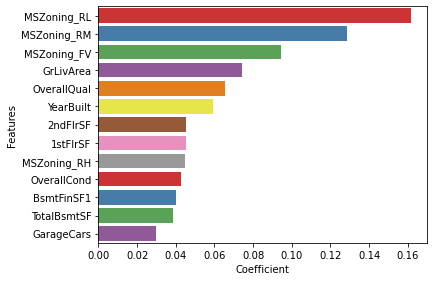

In [63]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = ridge_df.head(13))
plt.show()

In [64]:
# Lasso
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
lasso = Lasso()
folds = 5
lasso_model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv= folds,
                       return_train_score=True,
                       verbose= 1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.069884,-0.075267,1
1,0.0002,-0.069963,-0.075372,2
2,0.0003,-0.070054,-0.075467,3
3,0.0004,-0.070150,-0.075557,4
4,0.0005,-0.070273,-0.075687,5
5,0.001,-0.071094,-0.076333,6
6,0.002,-0.072119,-0.077055,7
7,0.003,-0.072641,-0.077374,8
8,0.004,-0.073182,-0.077782,9
9,0.005,-0.073841,-0.078360,10


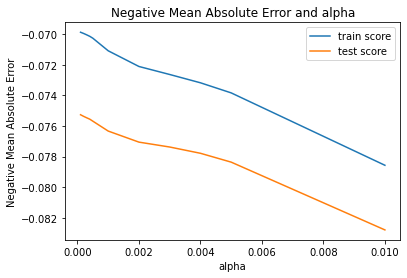

In [66]:
# Plot mean test and train scores against alpha

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting

plt.plot(lasso_cv_results['param_alpha'] , lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'] , lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score', 'test score'], loc='upper right')
plt.title("Negative Mean Absolute Error and alpha")
plt.show();

In [67]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.07526714533128168


In [68]:
alphaLasso = 0.0001

lasso = Lasso(alpha=alphaLasso)
print(lasso.fit(X_train, y_train))

Lasso(alpha=0.0001)


In [69]:
print(lasso.coef_)

[ 2.21837063e-02  6.57474960e-02  4.26366409e-02  5.93117927e-02
  1.42803776e-02  4.44386298e-02  8.02342035e-03 -0.00000000e+00
  3.29944503e-02  4.09749402e-02  3.93442248e-02 -3.25626803e-04
  8.06526411e-02  2.99578650e-02  1.34525079e-02  1.30471590e-02
  1.59338613e-02  9.50278618e-04  1.33161570e-02  1.65978512e-02
  1.48081421e-02  1.64706964e-02 -2.03658858e-02  1.59141807e-02
  9.24356198e-02  4.35701596e-02  1.58015878e-01  1.25184115e-01
  2.48604438e-02 -1.19702084e-02  2.20447946e-02  1.89339462e-02
  1.88426948e-02  0.00000000e+00 -2.39182445e-02 -2.19634549e-02
  0.00000000e+00 -1.31050465e-03 -1.87486198e-03  3.60221840e-03
 -2.57324030e-02 -3.02322558e-04 -1.33600571e-04  2.11075397e-07
  0.00000000e+00  2.31424646e-02  2.12920007e-02  1.51098826e-02
 -1.53032712e-02  1.32671409e-02 -1.40384883e-02  1.58364755e-02
 -5.25730558e-03 -1.38820217e-02 -1.13241746e-04 -1.47093196e-02
 -1.01441676e-02  2.47686136e-03 -2.49503068e-03 -1.43594007e-02]


In [70]:
print(mean_squared_error(y_test, lasso.predict(X_test)))


0.014756816504706415


In [71]:
### R2 score
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9110760289841962


In [72]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by ='Coefficient', ascending = False, inplace=True)
lasso_df

,Features,Coefficient
25,MSZoning_RL,0.1580
26,MSZoning_RM,0.1252
23,MSZoning_FV,0.0924
11,GrLivArea,0.0807
1,OverallQual,0.0657
3,YearBuilt,0.0593
5,BsmtFinSF1,0.0444
24,MSZoning_RH,0.0436
2,OverallCond,0.0426
8,1stFlrSF,0.0410


In [73]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.022183706292061376,
 'OverallQual': 0.0657474960329991,
 'OverallCond': 0.04263664089861941,
 'YearBuilt': 0.05931179266951517,
 'YearRemodAdd': 0.01428037756969828,
 'BsmtFinSF1': 0.04443862981052982,
 'BsmtFinSF2': 0.008023420351615207,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.03299445025545602,
 '1stFlrSF': 0.04097494018920986,
 '2ndFlrSF': 0.03934422480424177,
 'LowQualFinSF': -0.00032562680335023223,
 'GrLivArea': 0.08065264105655051,
 'GarageCars': 0.029957865029302814,
 'WoodDeckSF': 0.013452507918404836,
 'OpenPorchSF': 0.013047158963255246,
 'ScreenPorch': 0.015933861298898816,
 'PoolArea': 0.0009502786182377509,
 'd_BsmtExposure': 0.01331615696698982,
 'd_HeatingQC': 0.016597851156979745,
 'd_KitchenQual': 0.014808142061910674,
 'd_FireplaceQu': 0.016470696435382196,
 'd_BldgType': -0.020365885819902733,
 'd_SaleCondition': 0.015914180731272248,
 'MSZoning_FV': 0.09243561984678664,
 'MSZoning_RH': 0.04357015959080431,
 'MSZoning_RL': 0.15801587812181064,
 'MSZoning

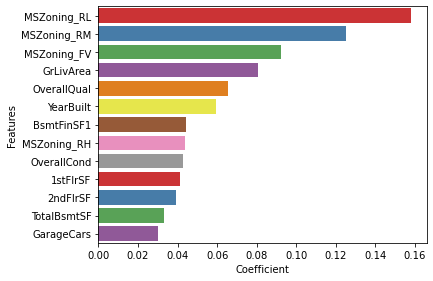

In [74]:
# bar plot to determine the variables that would affect pricing most using lasso regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = lasso_df.head(13))
plt.show()

#### Optimal value of Tuning Parameter Lambda
* Ridge: 0.9
* Lasso : 0.0001

#### MSE
- Ridge: 0.01498371
- Lasso: 0.01490161
-------------------------------------


- The Mean Squared Error for Lasso is slightly less than Ridge
- Lasso helps in feature reduction also as it makes some coefficients as zero
- The important variables from Lasso are: 
  MS_Zoning, Yr_Built , Gr_LivArea, Overall Quality, BsmtFinSF1

